# Using notebooks for developing EIS toolkit

This ipynb file showcases how
- Using and the testing eis_toolkit works in a notebook
- Using the libraries that eis toolkit dependends on works in a notebook

## General instructions

### Packages
You can use all of the eis_toolkit's dependencies in the notebooks. Do not install any packages by yourself!

### Where can I find data for testing?
Under `tests/data/` we have two directories for storing data:

- `tests/data/local/` to host data that should not be pushed to remote. Git ignores everything in this directory, and there will be no trace of it's contents on the remote. Good for when you use closed data for testing, but **use this by default for storing any data**.
- `tests/data/remote/` to host data that should be pushed to remote. Don't add anything here unless you specifically need it on the remote. Also, filesizes matter here - favour small files.

## Importing eis_toolkit
Before importing the eis_toolkit into a notebook's namespace, we must modify the path where python looks for modules. This is done so you won't have to pip install the library just for simple testing.

In [2]:
import sys
sys.path.insert(0, "..")

## Import tests
Here are some tests for importing functions from eis_toolkit and using them.

### Example: Resampling function

In [7]:
import rasterio
from rasterio.plot import show

from eis_toolkit.raster_processing.resampling import resample
from tests.raster_processing.clip_test import raster_path as SMALL_RASTER_PATH

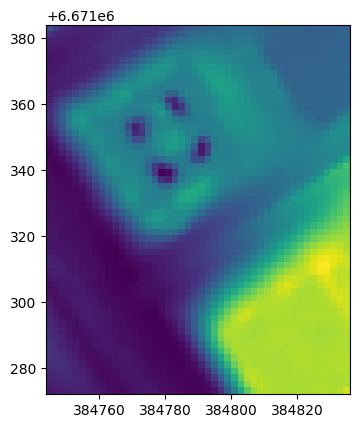

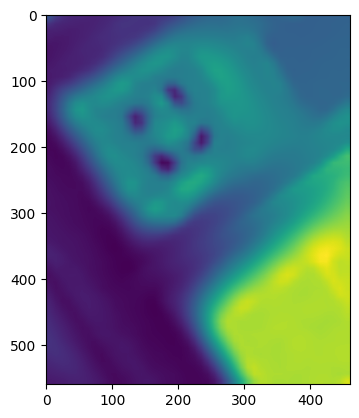

In [9]:
with rasterio.open(SMALL_RASTER_PATH) as small_raster:
    show(small_raster)
    out_image, out_meta = resample(small_raster, 10)
    show(out_image)

That worked fine!

## Test and experiment with dependent libraries in general

In addition to using and testing the functionality of eis_toolkit, you can also use the notebooks to experiment with all the libraries that eis_toolkit depends on. This could come in handy for exploring new functionalities.

For example, these imports work:

In [10]:
import numpy as np
import matplotlib.pyplot as plt

But of course, we cannot import anything that is not a dependency of eis_toolkit:

In [11]:
# This fails
import pygame

ModuleNotFoundError: No module named 'pygame'

Notebooks could be helpful for plotting, for example. Let's plot something:

In [12]:
def plot_random():
    """generate a plot of randomness"""
    
    fig, ax = plt.subplots()
    ax.plot(np.random.rand(15, 2))

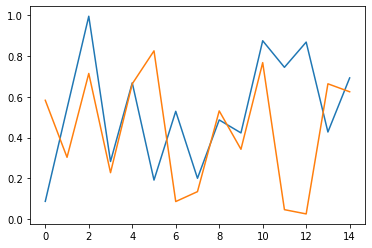

In [13]:
plot_random()

You can use external data as well:

In [14]:
import geopandas as gpd

# Read data from the test data folder. Prefer using local data in your own notebooks.
polygon = gpd.read_file("../tests/data/remote/small_area.shp")

Let's do something simple with geopandas, for example reproject a geodataframe:

In [15]:
print(type(polygon), polygon.crs)

<class 'geopandas.geodataframe.GeoDataFrame'> epsg:3067


In [16]:
polygon_3035 = polygon.to_crs(3035)

And see if it worked:

In [17]:
print(polygon_3035.crs)

epsg:3035


In [18]:
def plot_side_by_side(df1, df2):
    """plot two (geo)dataframes side by side"""
    
    fig, axs = plt.subplots(figsize=(15, 10), ncols=2)
    df1.plot(ax=axs[0])
    df2.plot(ax=axs[1])

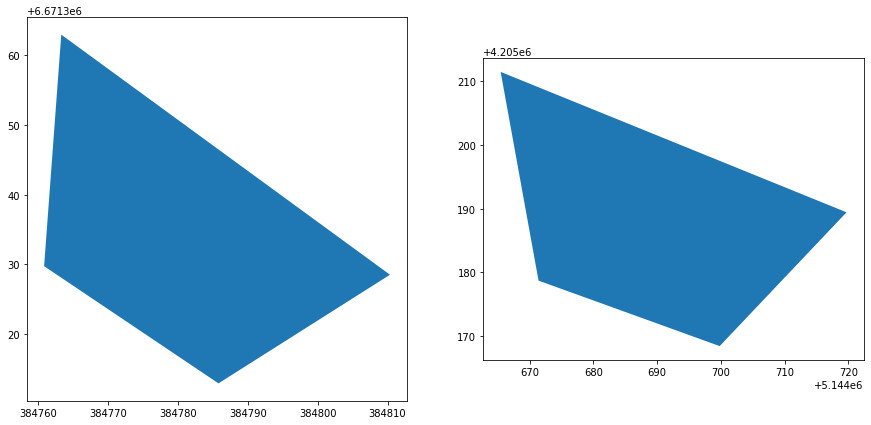

In [19]:
plot_side_by_side(
    polygon,
    polygon_3035,
)